In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [48]:
df = pd.read_csv('pokemon.csv')
poke_df = df[['Attack','Defense','Sp. Atk','Sp. Def','Total','Generation']]

PC 1 effects = {'#': 0.41, 'Name': 0.4, 'Type 1': 0.42, 'Type 2': 0.44, 'Total': 0.55, 'HP': 0.04}
PC 2 effects = {'#': 0.04, 'Name': 0.01, 'Type 1': -0.04, 'Type 2': -0.06, 'Total': -0.03, 'HP': 1.0}


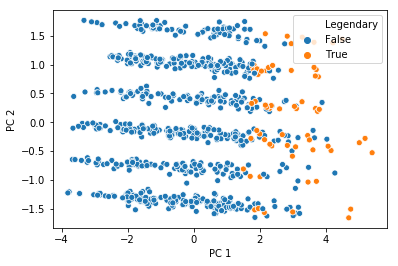

In [49]:
pipe = Pipeline([('scaler', StandardScaler()),
                 ('reducer', PCA(n_components=2))])

# Fit the pipeline to poke_df and transform the data
pc = pipe.fit_transform(poke_df)

vectors = pipe.steps[1][1].components_.round(2)

# Print feature effects
print('PC 1 effects = ' + str(dict(zip(df.columns, vectors[0]))))
print('PC 2 effects = ' + str(dict(zip(df.columns, vectors[1]))))

# Add the 2 components to poke_cat_df
df['PC 1'] = pc[:, 0]
df['PC 2'] = pc[:, 1]

# Use the Type feature to color the PC 1 vs PC 2 scatterplot
sns.scatterplot(data=df, 
                x='PC 1', y='PC 2', hue='Legendary')

plt.show()

In [38]:
X=df[['PC 1','PC 2']]
y= df.Legendary
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

# Build the pipeline
pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('reducer', PCA(n_components=2)),
        ('classifier', RandomForestClassifier(random_state=0))])

# Fit the pipeline to the training data
pipe.fit(X_train, y_train)

# Score the accuracy on the test set
accuracy = pipe.score(X_test, y_test)

# Prints the explained variance ratio and accuracy
print(pipe.steps[1][1].explained_variance_ratio_)
print('{0:.1%} test set accuracy'.format(accuracy))

[0.50255236 0.49744764]
94.0% test set accuracy


C:\noklab\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
